In [20]:
import numpy as np 
import pandas as pd 
# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.ensemble import RandomForestClassifier

In [30]:
# Read data
dataset = pd.read_csv('train.csv').set_index('PassengerId')
dataset_test = pd.read_csv('test.csv').set_index('PassengerId')

# Explore
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


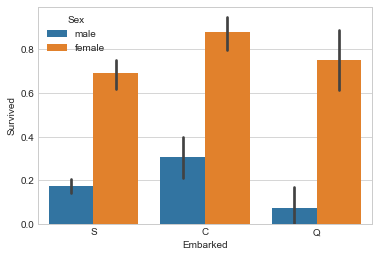

In [37]:
# Visualize 
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=dataset);

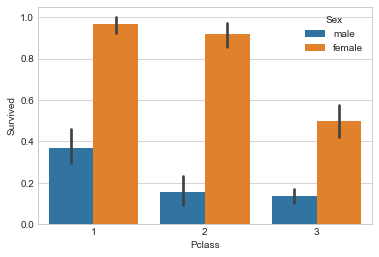

In [36]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=dataset);

In [86]:
# Fill missing values
# Fill Age
dataset.Age = dataset.Age.fillna(dataset.Age.mean())
dataset_test.Age = dataset_test.Age.fillna(dataset_test.Age.mean())
dataset.isnull().sum()
dataset_test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Cabin       0
Embarked    0
dtype: int64

In [89]:
# Fill Fare
dataset.Fare = dataset.Fare.fillna(dataset.Fare.mean())
dataset_test.Fare = dataset_test.Fare.fillna(dataset_test.Fare.mean())
dataset_test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [96]:
# drop irrelevant features
dataset = dataset.drop(['Ticket', 'Name', 'Embarked'], axis=1)
dataset_test = dataset_test.drop(['Ticket', 'Name', 'Embarked'], axis=1)
dataset.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,44.970819,0.523008,0.381594,262.074074,5.946128
std,0.486592,0.836071,0.477990,18.502755,1.102743,0.806057,83.488283,2.062347
min,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,32.000000,0.000000,0.000000,198.500000,7.000000
50%,0.000000,3.000000,1.000000,45.000000,0.000000,0.000000,257.000000,7.000000
75%,1.000000,3.000000,1.000000,55.000000,1.000000,0.000000,322.000000,7.000000
max,1.000000,3.000000,1.000000,99.000000,8.000000,6.000000,412.000000,8.000000


In [97]:
dataset_test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,45.885167,0.447368,0.392344,81.562201,5.976077
std,0.841838,0.481622,18.145329,0.896760,0.981429,62.618538,2.048431
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,34.000000,0.000000,0.000000,34.000000,7.000000
50%,3.000000,1.000000,47.000000,0.000000,0.000000,65.000000,7.000000
75%,3.000000,1.000000,55.750000,1.000000,0.000000,112.000000,7.000000
max,3.000000,1.000000,98.000000,8.000000,9.000000,413.000000,7.000000


In [98]:
# Feature scaling
from sklearn import preprocessing

features = ['Fare', 'Cabin', 'Age', 'Sex']
df_combined = pd.concat([dataset[features], dataset_test[features]])

for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(df_combined[feature])
    dataset[feature] = le.transform(dataset[feature])
    dataset_test[feature] = le.transform(dataset_test[feature])

In [99]:
# Splitting up the Training Data
from sklearn.model_selection import train_test_split

X_all = dataset.drop(['Survived'], axis=1)
y_all = dataset['Survived']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [100]:
# Fitting and Tuning an Algorithm
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)

In [102]:
from sklearn.metrics import make_scorer, accuracy_score

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8212290502793296
